Target labels:  [9 5 6 9 4 4 4 9 8 8]


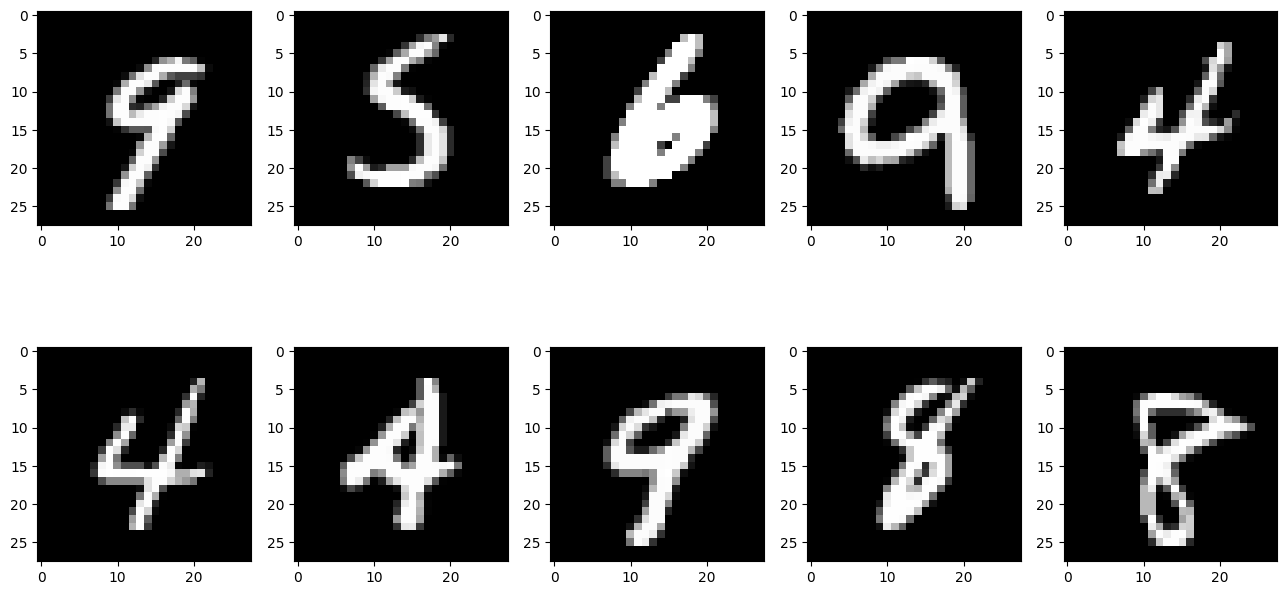

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8053 - loss: 0.9722 - val_accuracy: 0.9479 - val_loss: 0.3654
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9472 - loss: 0.3523 - val_accuracy: 0.9607 - val_loss: 0.2886
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9614 - loss: 0.2737 - val_accuracy: 0.9631 - val_loss: 0.2569
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9686 - loss: 0.2340 - val_accuracy: 0.9687 - val_loss: 0.2273
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9739 - loss: 0.2098 - val_accuracy: 0.9668 - val_loss: 0.2241
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9754 - loss: 0.1919 - val_accuracy: 0.9690 - val_loss: 0.2138
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9800 - loss: 0.1797 - val_accuracy: 0.9732 - val_loss: 0.1939
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9796 - loss: 0.1708 - val_accuracy: 0

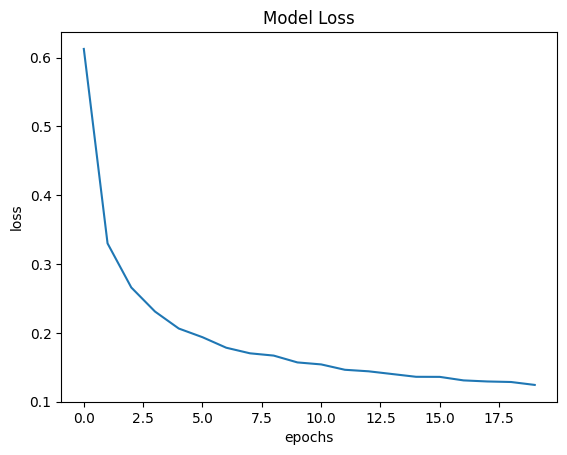

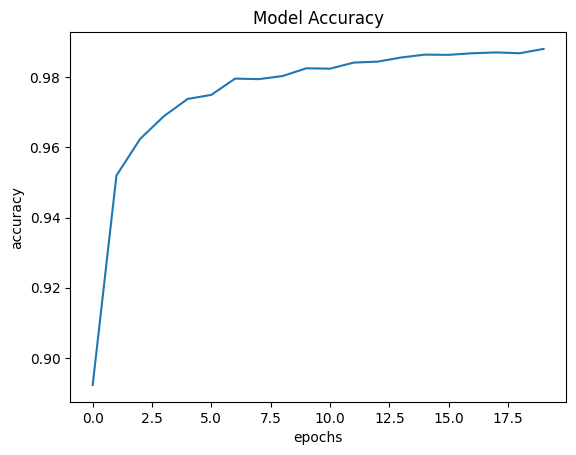

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9688 - loss: 0.1762
Loss of the Test dataset is: 0.16349652409553528
Accuracy of the test dataset is: 0.9751999974250793
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


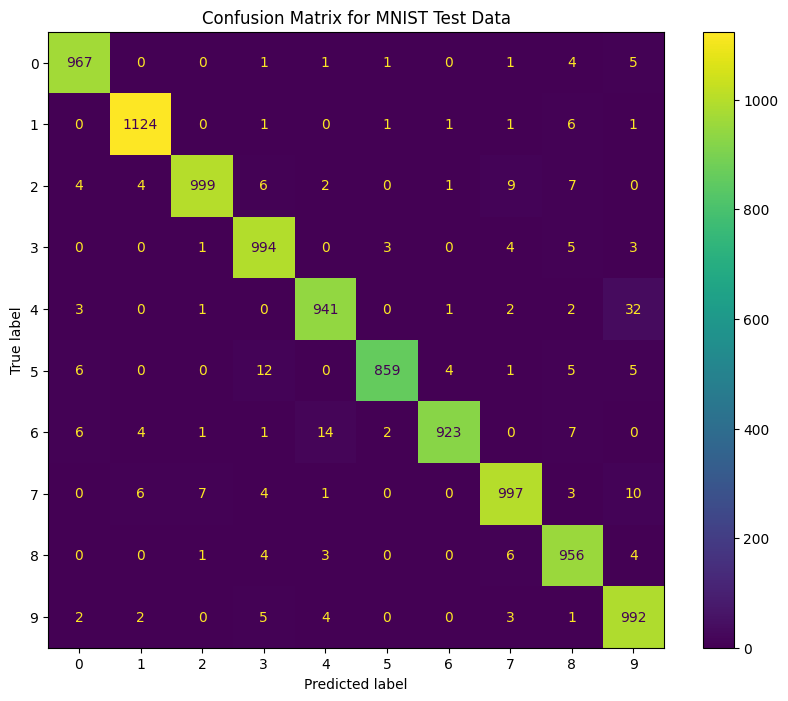

ValueError: The filename must end in `.weights.h5`. Received: filepath=MNIST_WEIGHTS_V1.h5

In [7]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

(train_data, train_target), (test_data, test_target) = mnist.load_data()

fig, axs = plt.subplots(2, 5, figsize=(16, 8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ', train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]], cmap='gray')
plt.show()

new_train_data = train_data / 255.0
new_test_data = test_data / 255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

# a. Improve the test accuracy of the model by changing the hyperparameters


model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

# b. Add L1 and L2 regularization terms to the model and retrain the model

model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.0001)))  # L1 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.0001)))   # L2 regularization
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

train_info = model.fit(new_train_data, new_train_target, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model Loss')
plt.show()

plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model Accuracy')
plt.show()

loss, acc = model.evaluate(new_test_data, new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')


# c. Visualize class-wise test dataset performance using a confusion matrix

predictions = np.argmax(model.predict(new_test_data), axis=1)

cm = confusion_matrix(test_target, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))

fig, ax = plt.subplots(figsize=(10, 8))
cm_display.plot(ax=ax)
plt.title('Confusion Matrix for MNIST Test Data')
plt.show()

model.save_weights('MNIST_WEIGHTS_V1.h5')
